# Peurto Rico billboard Dataset: Data Paper Code

## Import Libraries

In [1]:
%%capture
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

# Package for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import os

## Import Dataset

In [2]:
data = pd.read_csv("bMedia_BigTable.csv")
data.head(5)

Id   Latitude  Longitude       City    PR Direction     DEC   CPM   Size  \
0   1  18.412131 -67.152267  Aguadilla   PR2   Inbound   56300  3.56  17.07   
1   2  18.443750 -66.028556   Carolina  PR26  Outbound  142500  0.93  17.07   
2   3  18.411170 -66.223240   Toa Baja  PR22   Inbound   82500  2.42  17.07   
3   4  18.411170 -66.223240   Toa Baja  PR22  Outbound   82500  2.42  17.07   
4   5  18.422940 -66.152160     Catano  PR22   Inbound   97500  2.05  17.07   

   Price Prime  B01001001  B01001002  B01001003  B01001004  B01001005  \
0   6200    no     301661     163715    10260.0     7125.0      11143   
1   4123    no     140433      69438     2072.0      381.0       1879   
2   6200    no     520288     235937    20051.0    11443.0      13000   
3   6200    no     520288     235937    20051.0    11443.0      13000   
4   6200    no     246259     188850     4494.0        NaN       2332   

   B01001006  B01001007  B01001008  B01001009  B01001010  B01001011  \
0     6058.0     6287.0     3950.0     2559.0       5163       9799   
1      486.0     1395.0      937.0      842.0       2227       4832   
2        NaN     7735.0     3352.0     1757.0       9337      24686   
3        NaN     7735.0     3352.0     1757.0       9337      24686   
4     4664.0      382.0     2035.0     5342.0      14119      30570   

   B01001012  B01001013  B01001014  B01001015  B01001016  B01001017  \
0       4756       9300       4438       9938      12935      14359   
1       5357       5125       6265       4237       1576       6969   
2      21760      20397       3904       8685      13827      14877   
3      21760      20397       3904       8685      13827      14877   
4      25482      25991      20734      11787      15476       4537   

   B01001018  B01001019  B01001020  B01001021  B01001022  B01001023  \
0       2788      10675       3285       3593      10593       6330   
1       3154       2797        669       4920       6409       3077   
2       8570      10836       7380       3968       9800       9225   
3       8570      10836       7380       3968       9800       9225   
4       2205       3222       1993       2374       4113       3434   

   B01001024  B01001025  B01001026  B01001027  B01001028  B01001029  \
0       4851       3532     137946     2184.0     4069.0     7280.0   
1        876       2959      70996        NaN      529.0     3223.0   
2       5699       5648     284351     7235.0    19786.0    17175.0   
3       5699       5648     284351     7235.0    19786.0    17175.0   
4        806       2756      57410     4918.0      466.0     3562.0   

   B01001030  B01001031  B01001032  B01001033  B01001034  B01001035  \
0       4542     2298.0      545.0     2230.0     4367.0       9792   
1        297     1660.0      356.0     3882.0     1403.0       4617   
2       7832     5631.0     4502.0     3244.0    13648.0      27532   
3       7832     5631.0     4502.0     3244.0    13648.0      27532   
4        933      424.0        NaN        NaN     1484.0       6657   

   B01001036  B01001037  B01001038  B01001039  B01001040  B01001041  \
0       7915      10077     8547.0       6722       9558       8577   
1       3944       3932     1682.0       3631       3077       6877   
2      18022      19492    14310.0      10409      19600      20461   
3      18022      19492    14310.0      10409      19600      20461   
4       3053       4325     1738.0        890       4537       2417   

   B01001042  B01001043  B01001044  B01001045  B01001046  B01001047  \
0       4414       6491     3913.0       4078      12465       7623   
1       3271       9381     3696.0       2286       4878       2199   
2       7981      13349     9399.0      16299      11314       7631   
3       7981      13349     9399.0      16299      11314       7631   
4       1187       1442      466.0       3434       4113       5003   

   B01001048  B01001049  B01002001  B01002002  B01002003  B08008001  \
0     6580.0     3681.0      

## Dataset size

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Columns: 518 entries, Id to Building_area
dtypes: float64(203), int64(311), object(4)
memory usage: 898.5+ KB


The dataset consists of 518 features for 222 static billboards

## Exploratory Data Analysis (EDA)

### Statistical analysis for target variable

count      222.000000
mean      6414.702703
std       3200.547849
min       2077.000000
25%       4123.000000
50%       6200.000000
75%       6200.000000
max      21700.000000
Name: Price, dtype: float64


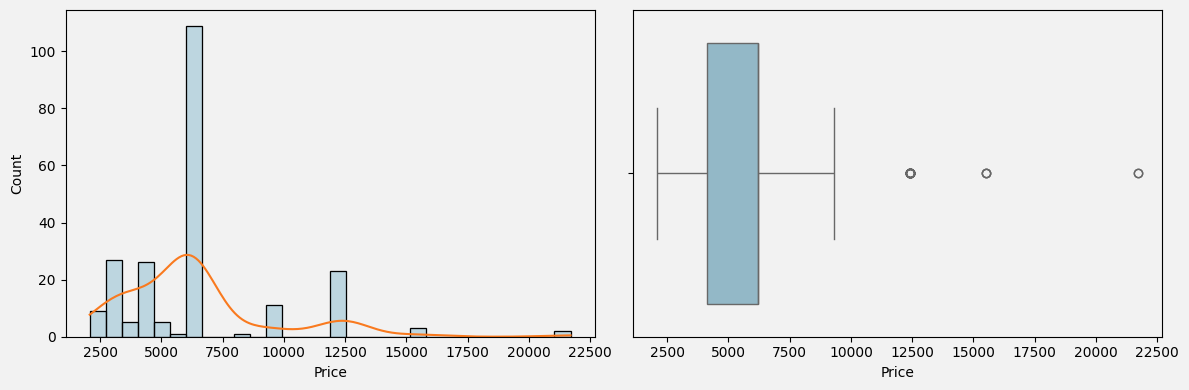

In [4]:
target = data['Price']
print(target.describe())

fig, ax  = plt.subplots(1,2,figsize=(12,4))
fig.patch.set_facecolor( '#F2F2F2')

sns.histplot(target, bins=30, color='#8abbd0', kde=True, ax=ax[0])
ax[0].patch.set_facecolor( '#F2F2F2')
ax[0].lines[0].set_color('#F97A1F')

sns.boxplot(x=target, ax=ax[1], color='#8abbd0')
ax[1].patch.set_facecolor( '#F2F2F2')

plt.tight_layout()

### Distribution of Size and Price Features

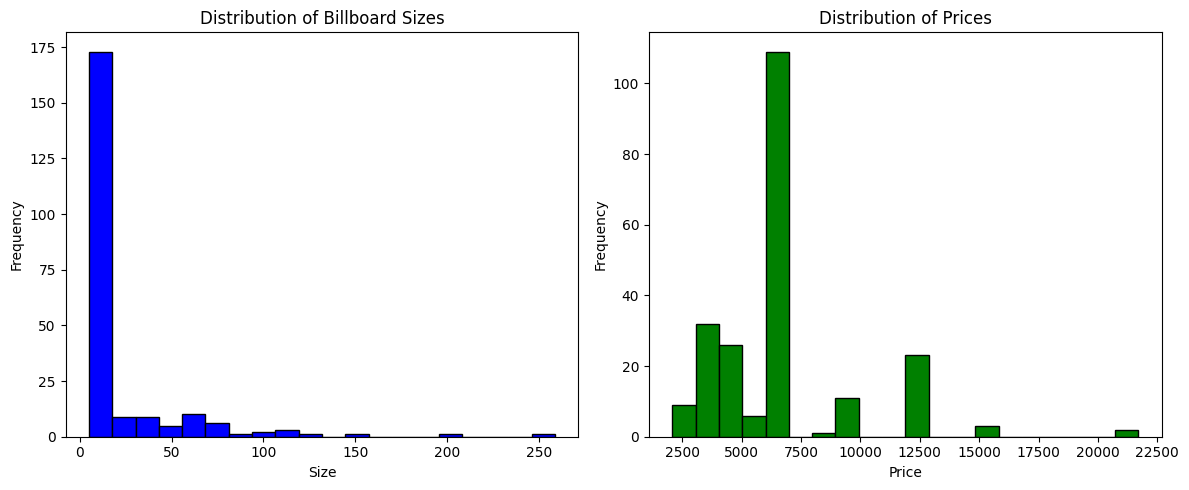

In [5]:
billboard_size = data['Size']
price = data['Price']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram of billboard sizes
axs[0].hist(billboard_size, bins=20, color='blue', edgecolor='black')
axs[0].set_title('Distribution of Billboard Sizes')
axs[0].set_xlabel('Size')
axs[0].set_ylabel('Frequency')

# Plot the histogram of prices
axs[1].hist(price, bins=20, color='green', edgecolor='black')
axs[1].set_title('Distribution of Prices')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Frequency of Price per Size

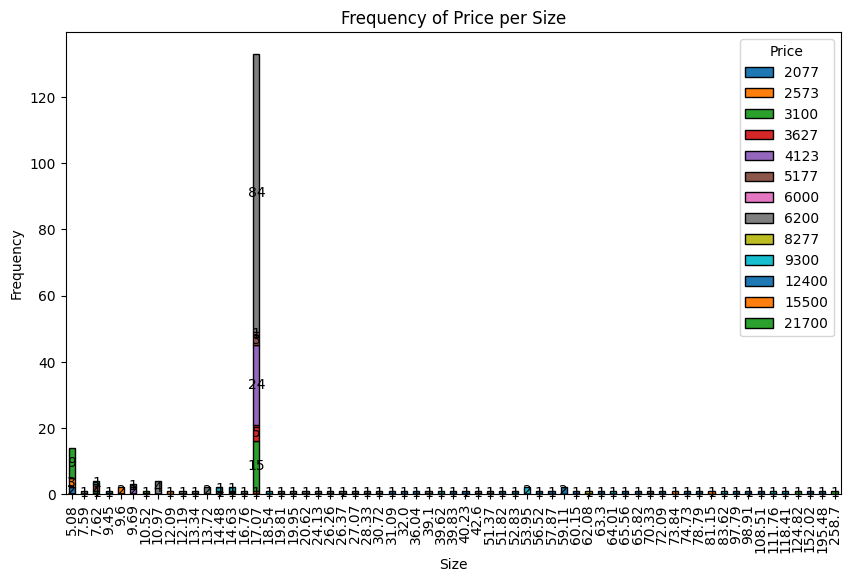

In [6]:
grouped_data = data.groupby('Price')['Size'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of Price per Size')
ax.set_xlabel('Size')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Size per Price

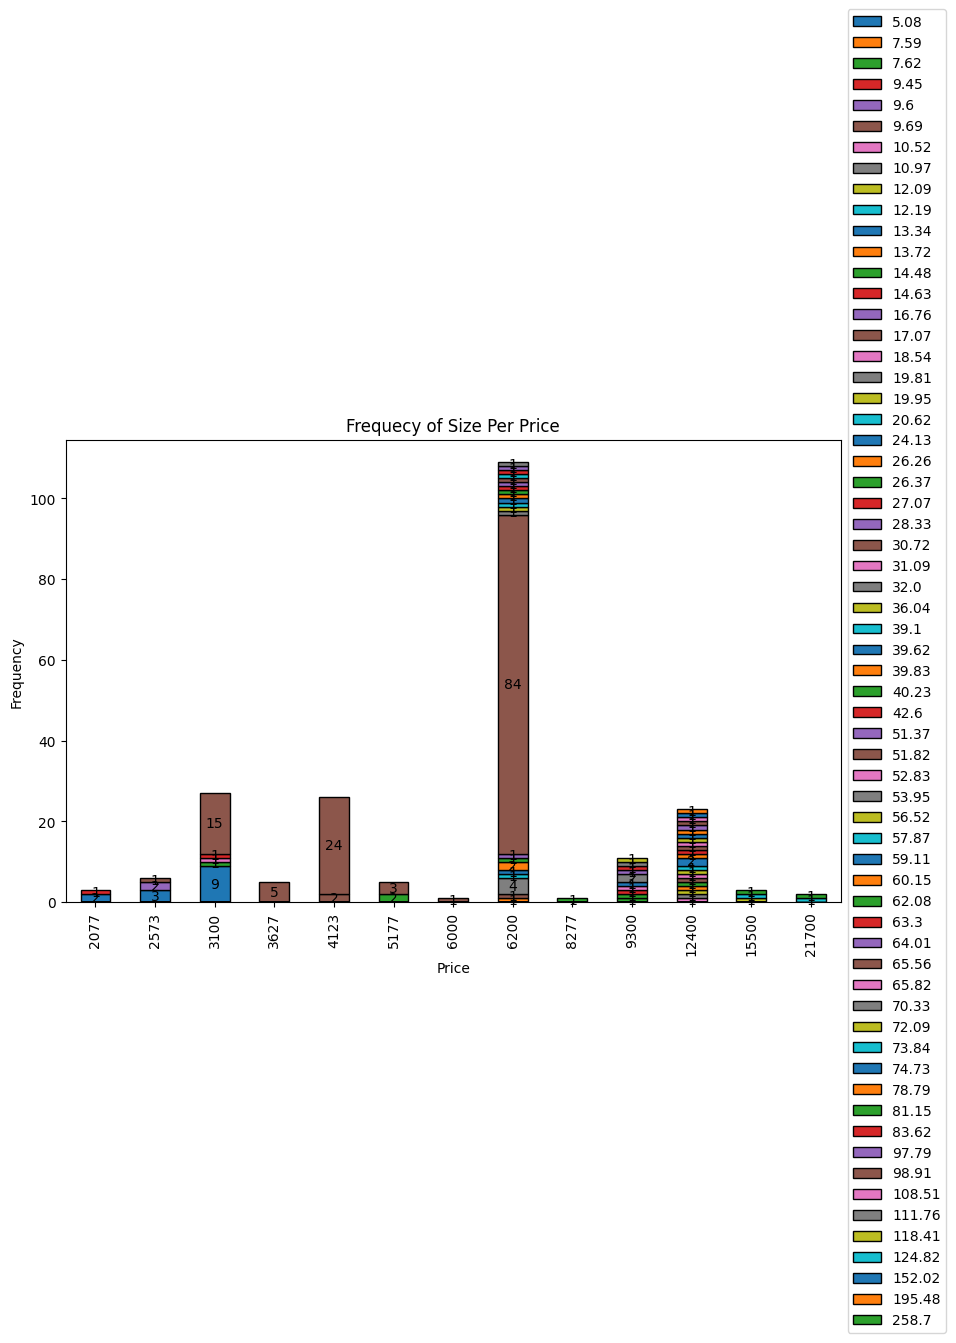

In [7]:
grouped_data = data.groupby('Size')['Price'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequecy of Size Per Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Move the legend outside and next to the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

### Frequency of Price Per Direction

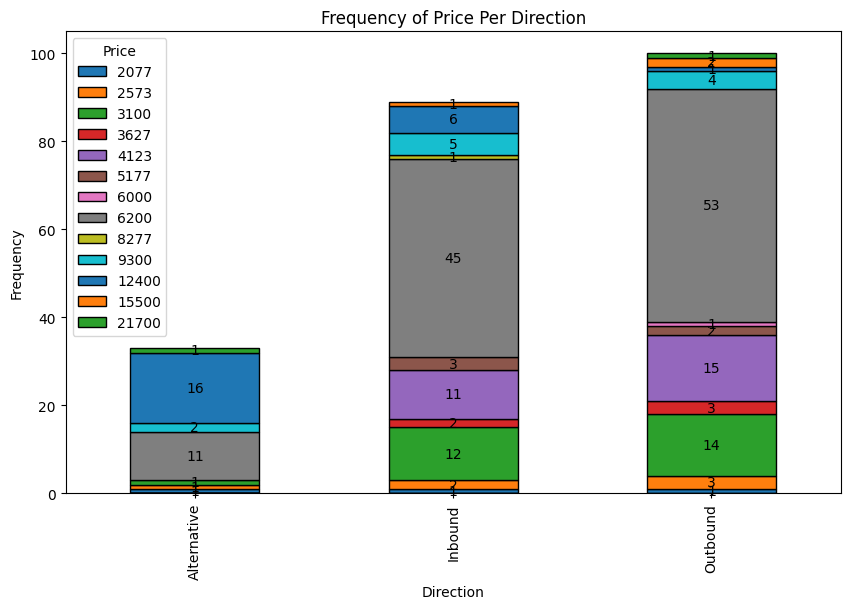

In [8]:
grouped_data = data.groupby('Price')['Direction'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of Price Per Direction')
ax.set_xlabel('Direction')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Price per DEC
Daily Effective Circulation (D.E.C) refers to the total number of potential visualizations for your billboard.
This number is based on the estimated traffic (1.5 people) per car on the road.

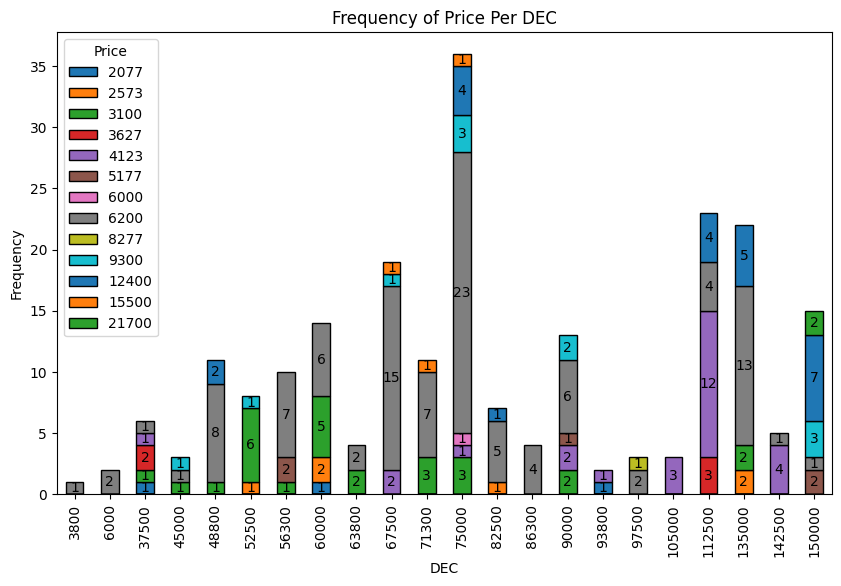

In [9]:
grouped_data = data.groupby('Price')['DEC'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of Price Per DEC')
ax.set_xlabel('DEC')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Price per CPM
CPM: cost per mille, or cost per thousand impressions

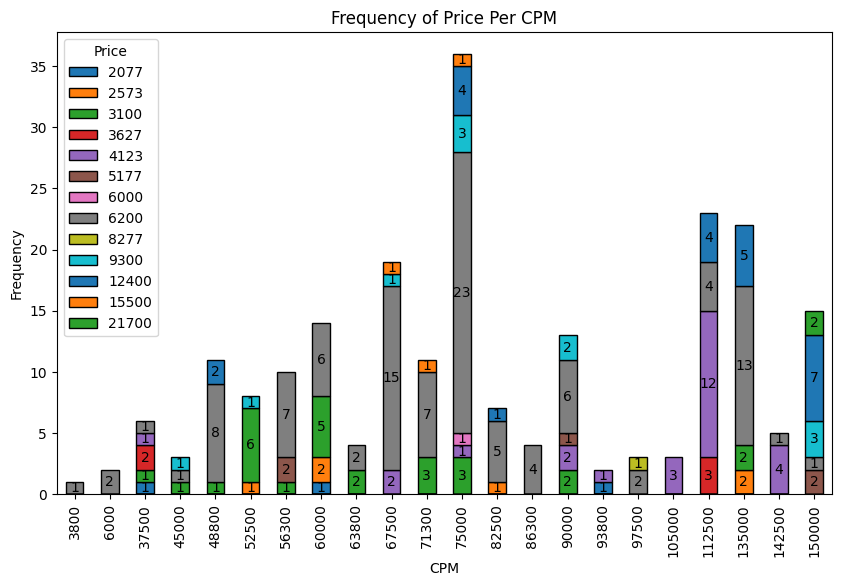

In [10]:
ouped_data = data.groupby('Price')['CPM'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of Price Per CPM')
ax.set_xlabel('CPM')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Price per City

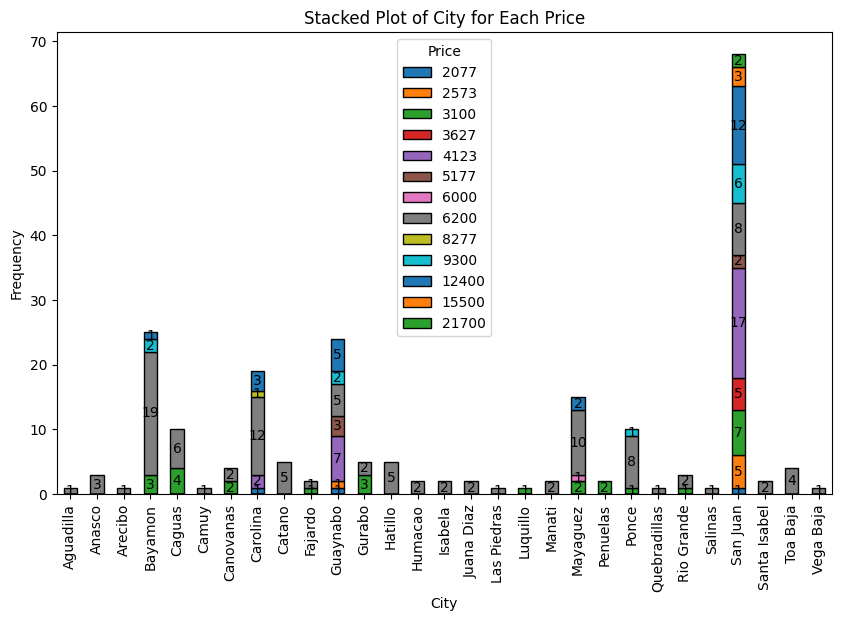

In [11]:
grouped_data = data.groupby('Price')['City'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of City for Each Price')
ax.set_xlabel('City')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Price per Prime location

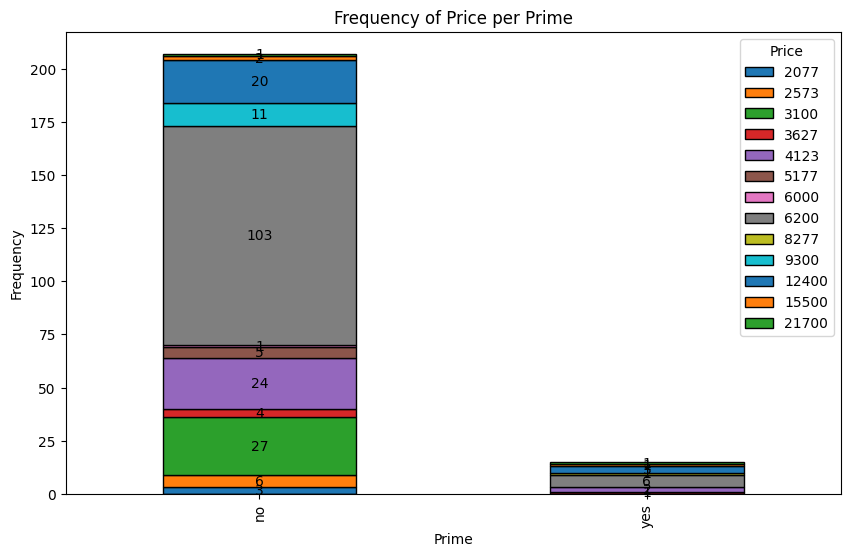

In [12]:
grouped_data = data.groupby('Price')['Prime'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of Price per Prime')
ax.set_xlabel('Prime')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

### Frequency of Prime location per Price

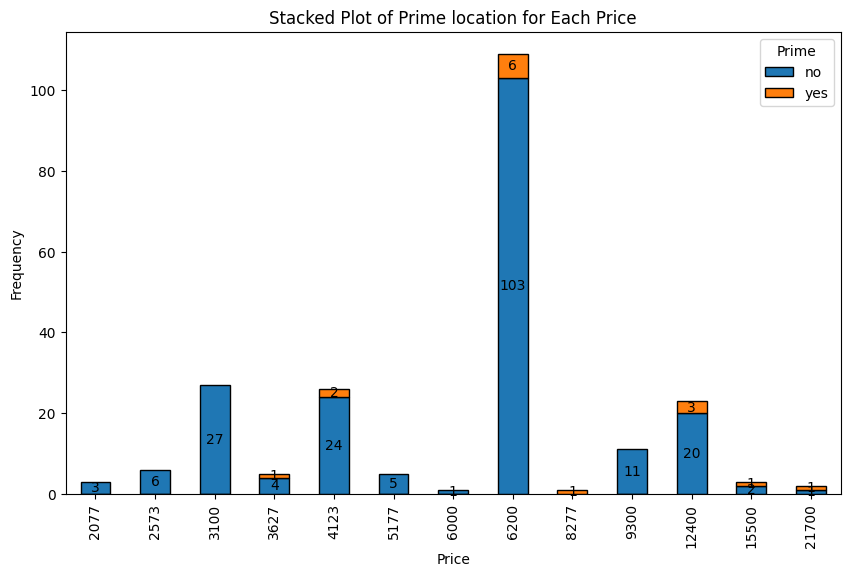

In [13]:
grouped_data = data.groupby('Prime')['Price'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of Prime location for Each Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

## Frequency of PR per Price

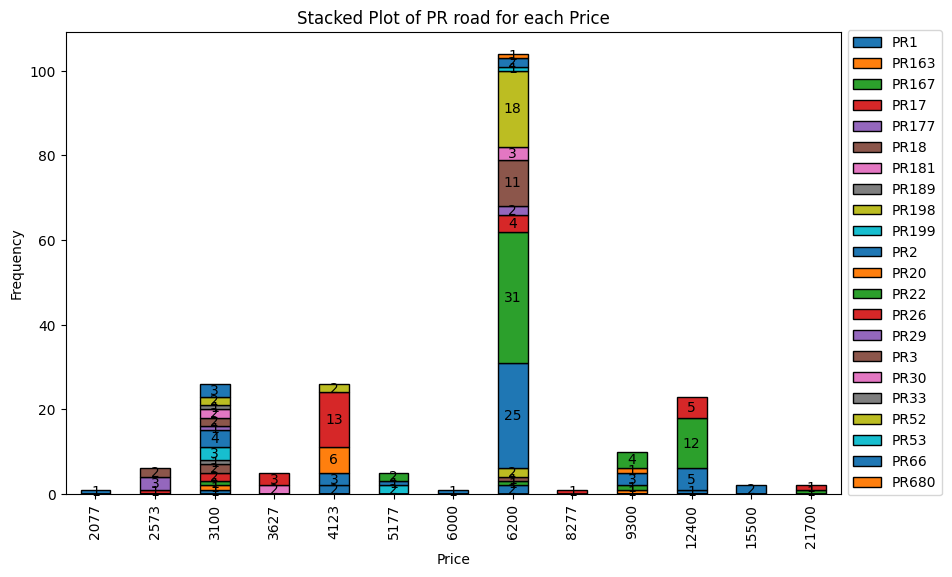

In [14]:
grouped_data = data.groupby('PR')['Price'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of PR road for each Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Move the legend outside and next to the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

### Frequency of PR per City

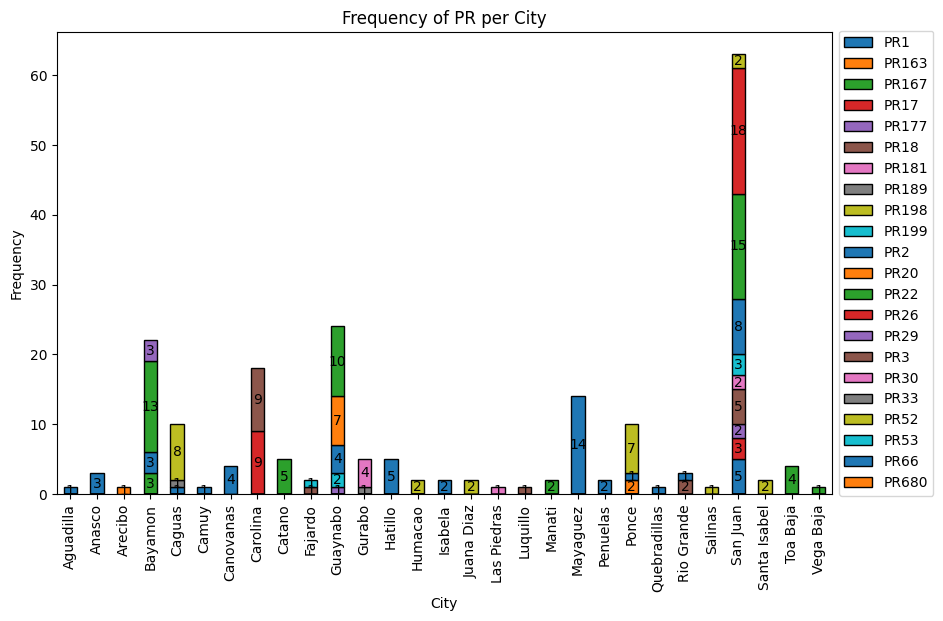

In [15]:
grouped_data = data.groupby('PR')['City'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Frequency of PR per City')
ax.set_xlabel('City')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Move the legend outside and next to the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

### Statistical analysis for numerical features

In [16]:
data.describe()

Id    Latitude   Longitude            DEC         CPM  \
count  222.000000  222.000000  222.000000     222.000000  222.000000   
mean   111.500000   18.356674  -66.233295   86330.630631    3.077297   
std     64.230055    0.125508    0.357084   33271.939430    4.658804   
min      1.000000   17.989583  -67.152267    3800.000000    0.610000   
25%     56.250000   18.357954  -66.185688   63800.000000    1.480000   
50%    111.500000   18.407159  -66.095002   75000.000000    2.670000   
75%    166.750000   18.431596  -66.053080  112500.000000    2.970000   
max    222.000000   18.487831  -65.650167  150000.000000   53.330000   

             Size         Price      B01001001      B01001002     B01001003  \
count  222.000000    222.000000     222.000000     222.000000    221.000000   
mean    26.362027   6414.702703  328490.603604  157947.022523   5681.895928   
std     30.065026   3200.547849  158017.626367   78560.905100   4847.847022   
min      5.080000   2077.000000   64112.000000   35620.000000    103.000000   
25%     17.070000   4123.000000  202795.000000   93497.750000   2380.000000   
50%     17.070000   6200.000000  311856.000000  150759.500000   4417.000000   
75%     17.070000   6200.000000  421961.500000  196082.000000   7194.000000   
max    258.700000  21700.000000  793200.000000  369000.000000  27300.000000   

          B01001004     B01001005     B01001006     B01001007     B01001008  \
count    220.000000    222.000000    219.000000    217.000000    203.000000   
mean    7206.709091   8216.094595   5962.785388   4516.737327   3143.635468   
std     5973.234598   6465.620969   5170.771225   3532.232484   2411.615849   
min        1.000000      2.000000      3.000000     25.000000     25.000000   
25%     3286.750000   3142.250000   2026.000000   2030.000000    972.000000   
50%     5741.500000   5968.000000   4428.000000   3560.000000   3050.000000   
75%     9439.000000  11558.000000   8597.500000   6132.000000   4427.500000   
max    33000.000000  29237.000000  27126.000000  18777.000000  11647.000000   

          B01001009     B01001010     B01001011     B01001012     B01001013  \
count    215.000000    222.000000    222.000000    222.000000    222.000000   
mean    3449.186047   7028.270270  12869.081081  11035.004505   9539.045045   
std     2890.373645   5204.358937   9014.737546   9054.092670   8511.235184   
min        5.000000    239.000000   1574.000000    455.000000    767.000000   
25%     1147.000000   3467.500000   7007.500000   4868.500000   4477.000000   
50%     2368.000000   5452.000000  10086.000000   7828.000000   6684.500000   
75%     5248.500000   8873.750000  15100.000000  14075.000000  10741.750000   
max    11782.000000  25706.000000  50764.000000  45441.000000  43844.000000   

          B01001014     B01001015     B01001016     B01001017     B01001018  \
count    222.000000    222.000000    222.000000    222.000000    222.000000   
mean   10204.081081   9483.842342  10576.963964   9526.851351   4260.594595   
std     7958.665795   5773.709714   5918.860729   6377.727245   3103.272260   
min      361.000000     79.000000    582.000000   1020.000000    155.000000   
25%     4421.500000   5064.750000   6149.000000   5593.750000   1894.750000   
50%     7846.000000   8000.000000   9314.000000   8503.500000   3477.500000   
75%    12825.500000  12467.250000  14100.000000  11661.500000   5855.750000   
max    33383.000000  25659.000000  25700.000000  51200.000000  14410.000000   

          B01001019     B01001020     B01001021     B01001022     B01001023  \
count    222.000000    222.000000    222.000000    222.000000    222.000000   
mean    5800.189189   3774.346847   5522.702703   6897.738739   5661.518018   
std     3809.861519   2799.055279   3988.436458   4607.413240   3347.574782   
min      500.000000    195.000000    742.000000   1085.000000   1158.000000   
25%     3284.000000   1726.250000   3024.000000   3649.000000   3162.500000   
50%     4820.000000   2900.000000   4372.000

### Statistical analysis for categorical features

In [17]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)
data[categorical].describe()

Index(['City', 'PR', 'Direction', 'Prime'], dtype='object')


City    PR Direction Prime
count        222   212       222   222
unique        29    22         3     2
top     San Juan  PR22  Outbound    no
freq          68    50       100   207

### Correlation analysis with target variable

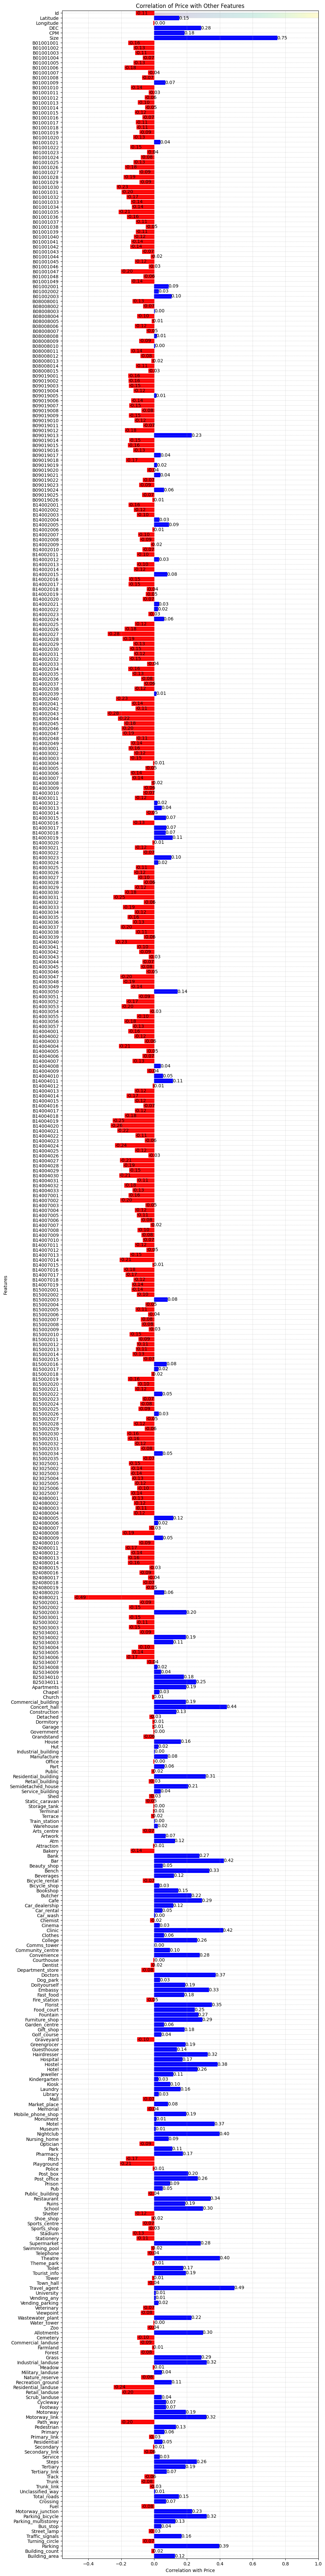

In [18]:
# Ensure data includes only numerical features
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Drop the 'Price' column from the correlation matrix
correlation_matrix_without_price = correlation_matrix.drop('Price', axis=1)

# Transpose the correlation matrix to swap rows and columns
correlation_matrix_transposed = correlation_matrix_without_price.T

# Create a gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Plotting the vertical Correlation Barplot with increased bar width and gradient background
plt.figure(figsize=(10, 100))  # Adjust the figure size as needed
plt.imshow(gradient, aspect='auto', extent=(0, 1, 0, 1), cmap='viridis', alpha=0.2)

# Create a barplot
bars = sns.barplot(x=correlation_matrix_transposed['Price'], 
                   y=correlation_matrix_transposed.index, 
                   linewidth=1)

# Customize bar colors and annotations
for bar, corr in zip(bars.patches, correlation_matrix_transposed['Price']):
    if corr < 0:
        bar.set_color('red')  # Red for negative correlation
    else:
        bar.set_color('blue')  # Blue for positive correlation
    
    # Annotate each bar with its correlation value
    plt.text(corr, bar.get_y() + bar.get_height() / 2, f'{corr:.2f}', va='center')

plt.title('Correlation of Price with Other Features')
plt.xlabel('Correlation with Price')
plt.ylabel('Features')

# Add grid lines to the plot
plt.grid(visible=True, axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

This Price is highly correlated with billboard size (75%). Therefore, we check if the price is biased by the size feature next.

### Bias check between Price and Size

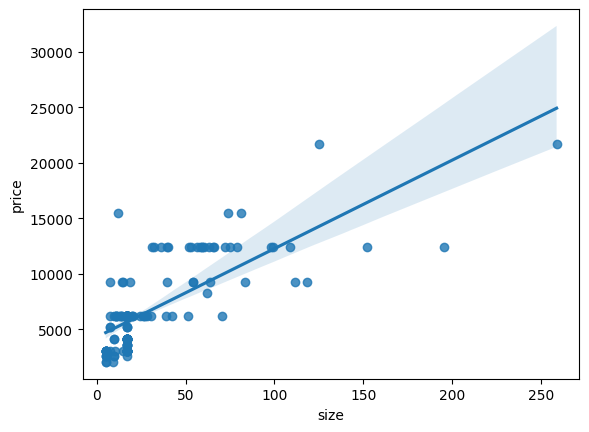

In [19]:
# Create a DataFrame
df = pd.DataFrame({'size': data['Size'], 'price': data['Price']})

# Plot the data
sns.regplot(data=df, x='size', y='price')

# Show the plot
plt.show()

In [20]:
# check for bias in a linear regression model between 'Size' and 'Price' using a p-value.

# we need to determine whether the coefficient of the 'Size' variable,
#   in the linear regression model is statistically significant.

x = data['Size'].values.reshape(-1, 1)  # reshape to convert from 1D to 2D as we're using one feature
y = data['Price']

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Add a constant term to the independent variable (for the intercept term)
# we add a constant term to the independent variable 'x' using statsmodels,
# which is required to get additional statistics from the model.
x_with_constant = sm.add_constant(x)

# Fit the linear regression model with statsmodels to get additional statistics
model_sm = sm.OLS(y, x_with_constant).fit()

# Get the p-value (probability value) associated with the 'Size' variable
p_value_size = model_sm.pvalues[1]

# Check if the 'Size' variable is statistically significant (alpha = 0.05)
if p_value_size < 0.05:
    print("We are good, the 'Size' variable is statistically significant, not biased.")
else:
    print("There might be bias, the 'Size' variable is not statistically significant.")

We are good, the 'Size' variable is statistically significant, not biased.


## Import Klib library
Klib is a python library for importing, cleaning, analyzing and preprocessing data.

In [21]:
%%capture
%pip install -U klib
import klib as klib

## Missing Value Plot
This plot visualizes the missing values in a dataset. At the top it shows the aggregate for each column using a relative scale and absolute missing-value annotations, while on the right, summary statistics and individual row results are displayed. Using this plot allows to gain a quick overview over the structure of missing values and their relation in a dataset and easily determine which columns and rows to investigate / drop.

GridSpec(6, 6)

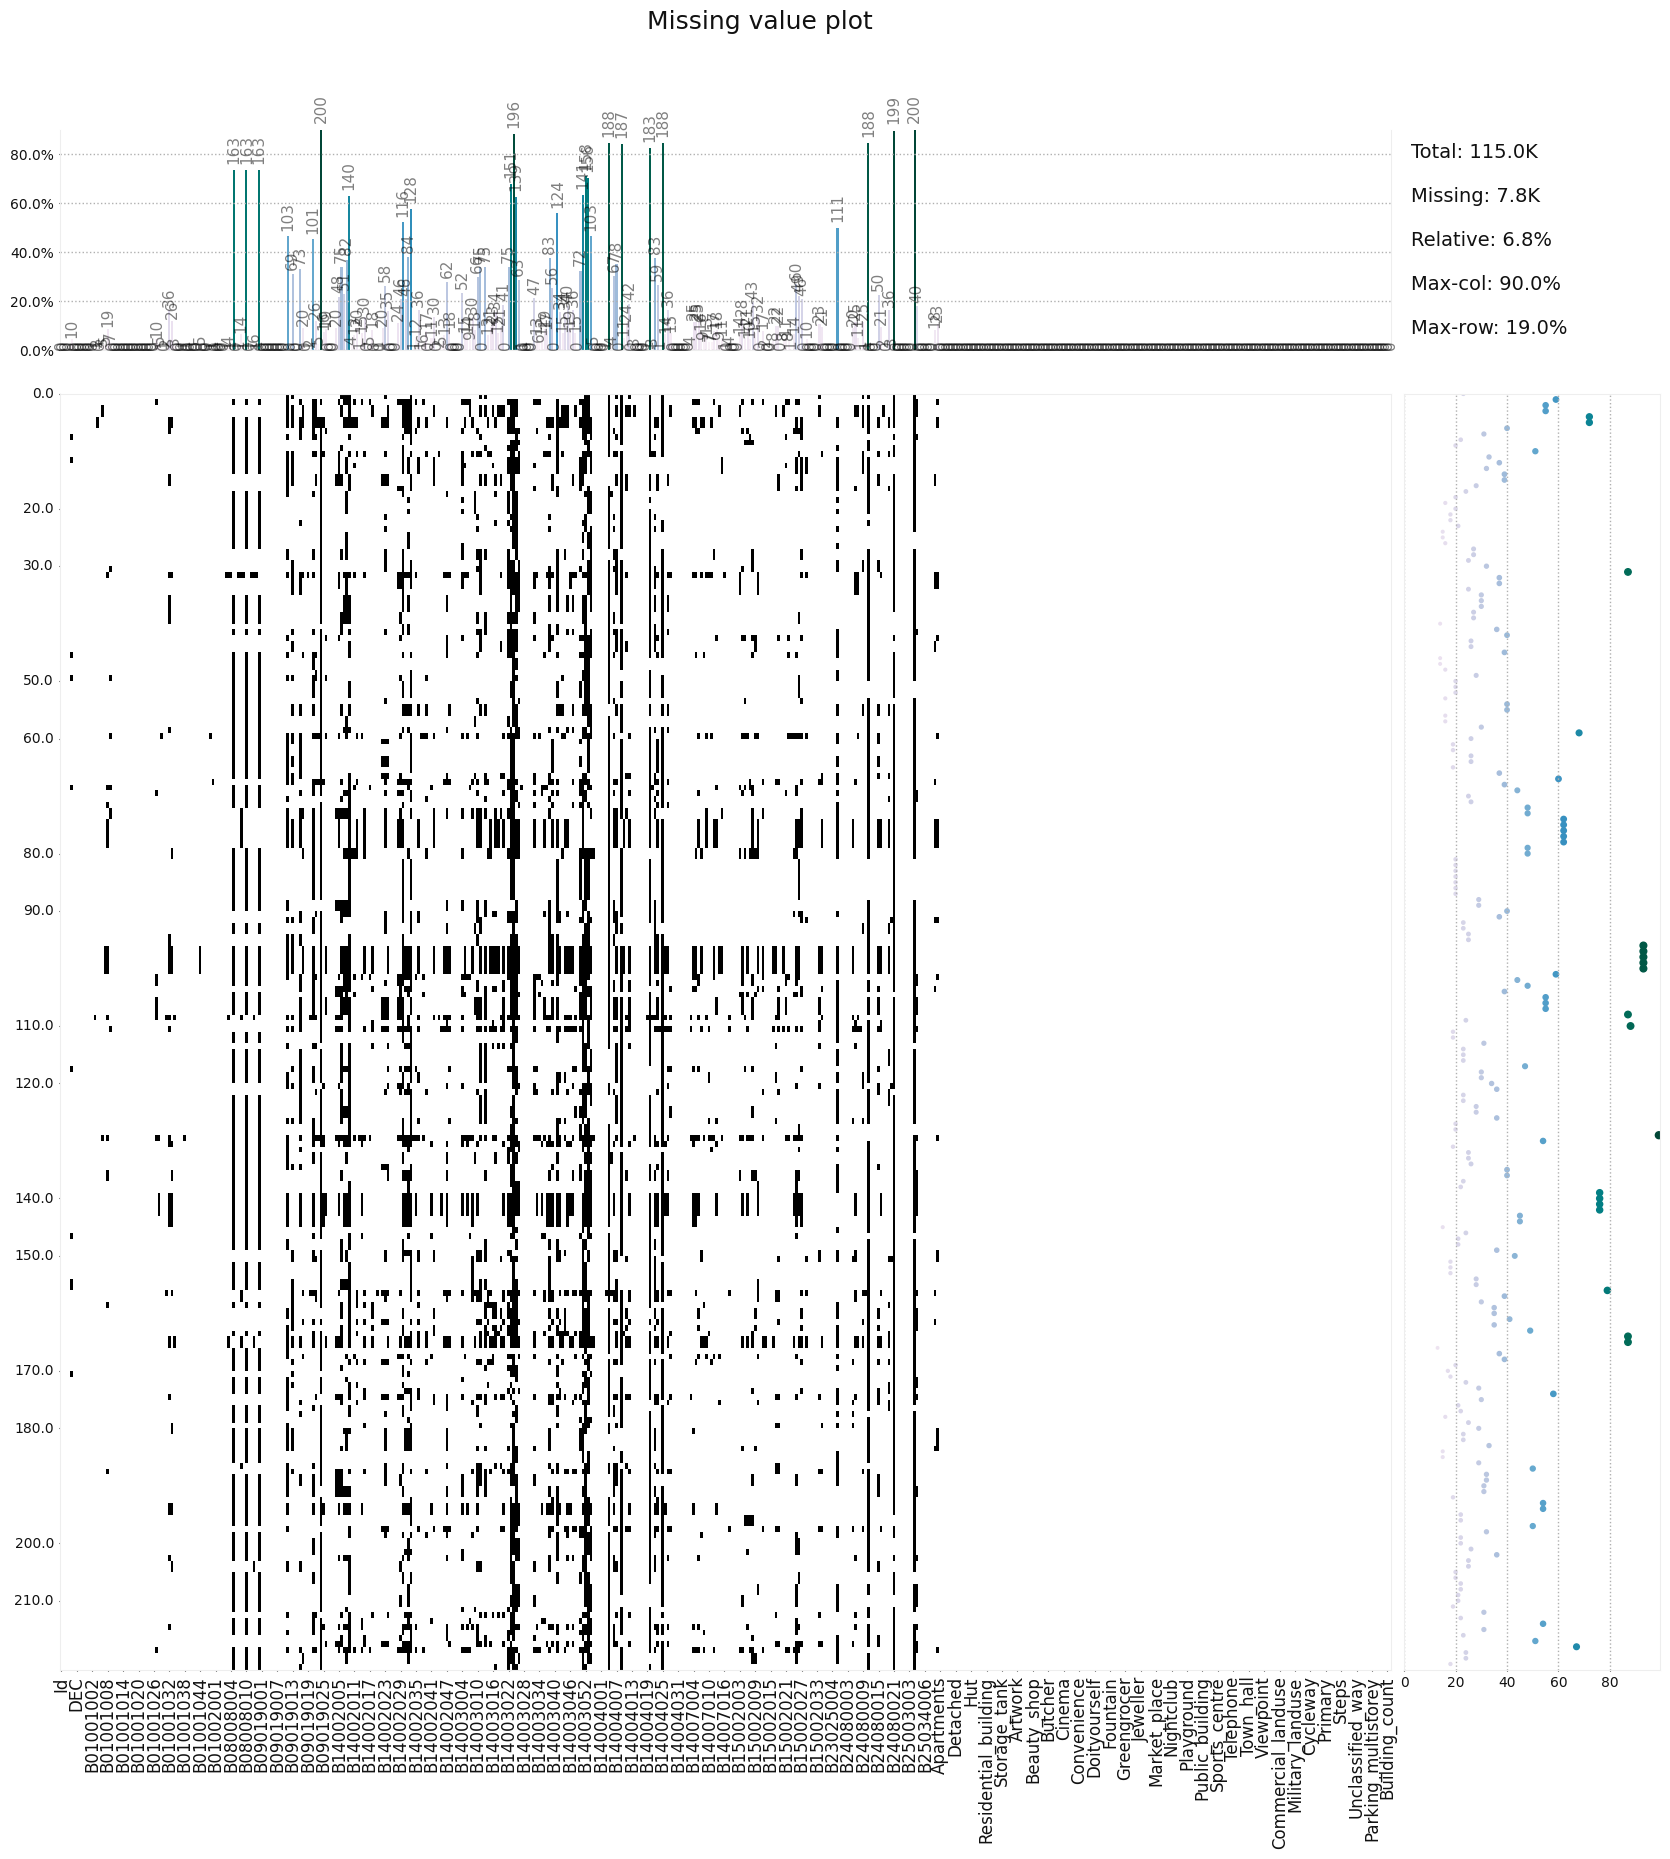

In [22]:
klib.missingval_plot(data) # default representation of missing values, other settings such as sorting are available

## Data Cleaning
automatic data cleaning using Klib backage which would drop duplicates and empty rows/columns, adjust data type, etc

In [23]:
klib.data_cleaning(data)

Shape of cleaned data: (222, 516) - Remaining NAs: 7387


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 0 single valued.     Columns: []
Dropped missing values: 400
Reduced memory by at least: 0.57 MB (-64.77%)



id   latitude  longitude       city    pr direction     dec   cpm  \
0      1  18.412130 -67.152267  Aguadilla   PR2   Inbound   56300  3.56   
1      2  18.443750 -66.028557   Carolina  PR26  Outbound  142500  0.93   
2      3  18.411169 -66.223244   Toa Baja  PR22   Inbound   82500  2.42   
3      4  18.411169 -66.223244   Toa Baja  PR22  Outbound   82500  2.42   
4      5  18.422939 -66.152161     Catano  PR22   Inbound   97500  2.05   
..   ...        ...        ...        ...   ...       ...     ...   ...   
217  218  18.428480 -66.374344  Vega Baja  PR22  Outbound   82500  2.42   
218  219  18.443825 -66.029930   San Juan  PR26   Inbound  142500  0.93   
219  220  18.414555 -66.069885   San Juan  PR18   Inbound  135000  0.61   
220  221  18.414555 -66.069885   San Juan  PR18  Outbound  135000  0.61   
221  222  18.420042 -66.185722    Bayamon  PR22   Inbound   67500  2.96   

      size  price prime  b01001001  b01001002  b01001003  b01001004  \
0    17.07   6200    no     301661     163715    10260.0     7125.0   
1    17.07   4123    no     140433      69438     2072.0      381.0   
2    17.07   6200    no     520288     235937    20051.0    11443.0   
3    17.07   6200    no     520288     235937    20051.0    11443.0   
4    17.07   6200    no     246259     188850     4494.0        NaN   
..     ...    ...   ...        ...        ...        ...        ...   
217  17.07   6200   yes     660483     312748     9587.0    12488.0   
218  17.07   4123    no     120131      59071     1667.0      314.0   
219   5.08   2573    no     249700      99331     2207.0        9.0   
220   5.08   2573    no     249700      99331     2207.0        9.0   
221  17.07   6200    no     406274     192963     6540.0    12597.0   

     b01001005  b01001006  b01001007  b01001008  b01001009  b01001010  \
0        11143     6058.0     6287.0     3950.0     2559.0       5163   
1         1879      486.0     1395.0      937.0      842.0       2227   
2        13000        NaN     7735.0     3352.0     1757.0       9337   
3        13000        NaN     7735.0     3352.0     1757.0       9337   
4         2332     4664.0      382.0     2035.0     5342.0      14119   
..         ...        ...        ...        ...        ...        ...   
217      13368    11001.0    14650.0     4223.0     4158.0      13147   
218       1202      144.0     1169.0      285.0      521.0       2276   
219         12       13.0     1050.0     3041.0     4244.0       1278   
220         12       13.0     1050.0     3041.0     4244.0       1278   
221      18582     5880.0     2708.0     2517.0     1786.0       4147   

     b01001011  b01001012  b01001013  b01001014  b01001015  b01001016  \
0         9799       4756       9300       4438       9938      12935   
1         4832       5357       5125       6265       4237       1576   
2        24686      21760      20397       3904       8685      13827   
3        24686      21760      20397       3904       8685      13827   
4        30570      25482      25991      20734      11787      15476   
..         ...        ...        ...        ...        ...        ...   
217      26801      26776      24100      20509      15158       4825   
218       3026       5248       5065       6725       4015        841   
219      10066       9173       5013       1891      10528       7333   
220      10066       9173       5013       1891      10528       7333   
221      12122      15408       6958      18446      11055      10262   

     b01001017  b01001018  b01001019  b01001020  b01001021  b01001022  \
0        14359       2788      10675       3285       3593      10593   
1         6969       3154       2797        669       4920       6409   
2        14877       8570      10836       7380       3968       9800   
3        14877       8570      10836       7380       3968       9800   
4         4537       2205       3222       1993       2374       4113   
..         ...        ...        ...        ...        ...  

## Handling Missing Values

### Find missing values

In [24]:
# Count the number of null values
null_counts = data.isnull().sum().sum()

print("Number of null values:")
print(null_counts)

# Check for missing values in each column
columns_with_missing = data.isnull().any()

# Select columns with null values
columns_with_null_values = data.columns[data.isnull().any()].tolist()

# Display the columns that have null values
print("Columns with null values:")
print(columns_with_null_values)

Number of null values:
7787
Columns with null values:
['PR', 'B01001003', 'B01001004', 'B01001006', 'B01001007', 'B01001008', 'B01001009', 'B01001027', 'B01001028', 'B01001029', 'B01001031', 'B01001032', 'B01001033', 'B01001034', 'B01001038', 'B01001044', 'B01001048', 'B01001049', 'B08008002', 'B08008003', 'B08008004', 'B08008005', 'B08008007', 'B08008008', 'B08008009', 'B08008010', 'B08008012', 'B08008013', 'B08008014', 'B08008015', 'B09019011', 'B09019013', 'B09019016', 'B09019017', 'B09019019', 'B09019020', 'B09019021', 'B09019022', 'B09019023', 'B09019024', 'B09019025', 'B09019026', 'B14002004', 'B14002005', 'B14002006', 'B14002007', 'B14002008', 'B14002009', 'B14002010', 'B14002011', 'B14002012', 'B14002013', 'B14002014', 'B14002015', 'B14002017', 'B14002018', 'B14002020', 'B14002022', 'B14002023', 'B14002024', 'B14002028', 'B14002029', 'B14002030', 'B14002031', 'B14002032', 'B14002033', 'B14002034', 'B14002035', 'B14002036', 'B14002037', 'B14002038', 'B14002039', 'B14002041', 'B1

### Step 1: Drop any feature that has null values more than 50%

In [25]:
# Step 1: Drop columns with null values over 50% for each column
for column in columns_with_null_values:
    null_percentage = data[column].isnull().mean() * 100
    if null_percentage > 50:
        data.drop(columns=column, inplace=True)

# Desplay shape of dataframe after dropping columns

print("dataframe size after dropping columns with +50% null values")
print(data.shape)

dataframe size after dropping columns with +50% null values
(222, 497)


### Step 2: Fill missing values of PR feature (categorical feature) with most frequent value

In [26]:
# Step 2: Handling missing values in PR column: Fill NA with most frequent value

# Calculate the most frequent value for column 'PR'
most_frequent_PR = data['PR'].mode().iloc[0]
# Print the most frequent value of PR:
print("Most frequent value of PR: ")
print(most_frequent_PR)
# Fill null values in column 'PR' with the most frequent value
data['PR'].fillna(most_frequent_PR, inplace=True)

Most frequent value of PR: 
PR22


### Step 3: Fill missing values with the avergage value per city, if a city doesn't have any value, then fill its missing values with feature average

In [27]:
# Step 3: Fill null values with the average per city for remaining columns

# Create a copy of the original DataFrame
data_copy2 = data.copy()

def fill_null_with_city_mean(df):
    null_values_replaced = 0
    null_values_remaining = 0

    for col in df.columns:
        if df[col].isnull().any():
            city_means = df.groupby('City')[col].mean()

            # Replace null values in entire cities with the overall column mean
            for city in city_means.index:
                if df.loc[df['City'] == city, col].isnull().all():
                    # Replace null values in the entire city with the overall column mean
                    overall_mean_value = df[col].mean()
                    df.loc[df['City'] == city, col] = overall_mean_value
                    # Store the index of the city with all null values for later use
                    city_index = df[df['City'] == city].index[0]
                    print(f"Filled null value at index {city_index}, column '{col}' with feature overall mean: {overall_mean_value}")

            # Fill individual null values with city-wise means
            for index, value in enumerate(df[col]):
                if pd.isnull(value):
                    null_values_remaining += 1
                    city = df.at[index, 'City']
                    city_mean_value = city_means.get(city, None)  # Get the city-wise mean value if city exists
                    if city_mean_value is not None:
                        df.at[index, col] = city_mean_value
                        null_values_replaced += 1
                        print(f"Filled null value at index {index}, column '{col}' with city-wise mean: {city_mean_value}")
                    else:
                        print(f"City '{city}' not found in city-wise means for column '{col}'")

    print(f"Number of null values replaced: {null_values_replaced}")
    print(f"Number of null values still remaining: {null_values_remaining}")

    return df

# Apply the function to fill null values with the city-wise mean
data_null_free = fill_null_with_city_mean(data_copy2)

Filled null value at index 108, column 'B01001003' with feature overall mean: 5681.89592760181
Filled null value at index 4, column 'B01001004' with city-wise mean: 7183.333333333333
Filled null value at index 5, column 'B01001004' with city-wise mean: 7183.333333333333
Filled null value at index 2, column 'B01001006' with city-wise mean: 1207.0
Filled null value at index 3, column 'B01001006' with city-wise mean: 1207.0
Filled null value at index 129, column 'B01001006' with city-wise mean: 2832.9850746268658
Filled null value at index 96, column 'B01001007' with city-wise mean: 2073.8888888888887
Filled null value at index 97, column 'B01001007' with city-wise mean: 2073.8888888888887
Filled null value at index 98, column 'B01001007' with city-wise mean: 2073.8888888888887
Filled null value at index 99, column 'B01001007' with city-wise mean: 2073.8888888888887
Filled null value at index 100, column 'B01001007' with city-wise mean: 2073.8888888888887
Filled null value at index 74, co

## Visualize the relation between Price and Categorical Features

### 1- Count Plot:

* Shows the distribution of categories in a categorical feature using vertical bars.
* Helps visualize the frequency of each category and assess data quality.
* The y-axis represents the categories, and the x-axis represents the count of occurrences of each category.

### 2- Violin Plot:

* Combines a box plot with a kernel density plot.
* Visualizes the distribution of the target variable 'Price' within each category.
* The x-axis represents the categorical feature, and the y-axis represents the 'Price' distribution.
* The violin shape shows the density of 'Price' values for each category.

### 3- Box Plot:

* Provides a visual summary of the 'Price' distribution within each category.
* Shows the Interquartile Range (IQR) and identifies potential outliers.
* The x-axis represents the categorical feature, and the y-axis represents the 'Price'.

### 4- Point Plot:

* Shows the average 'Price' for each category.
* The x-axis represents the categorical feature, and the y-axis represents the average 'Price'.
* Error bars indicate the confidence interval around the mean 'Price'.
* Useful for comparing average 'Price' between different categories.

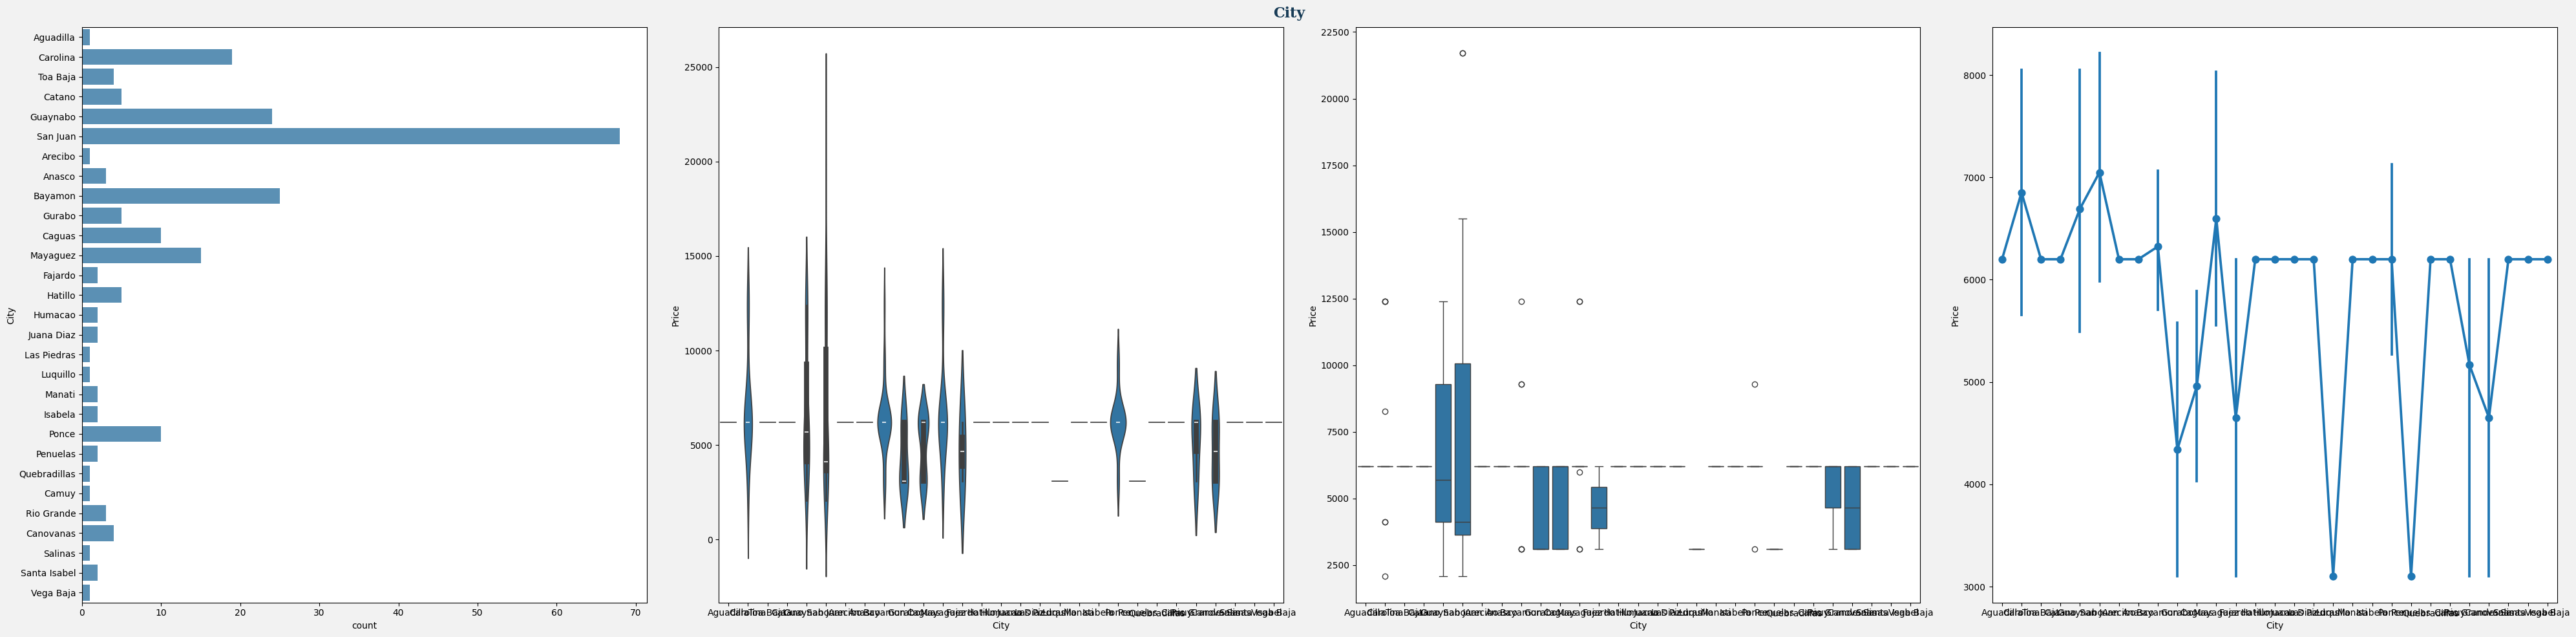

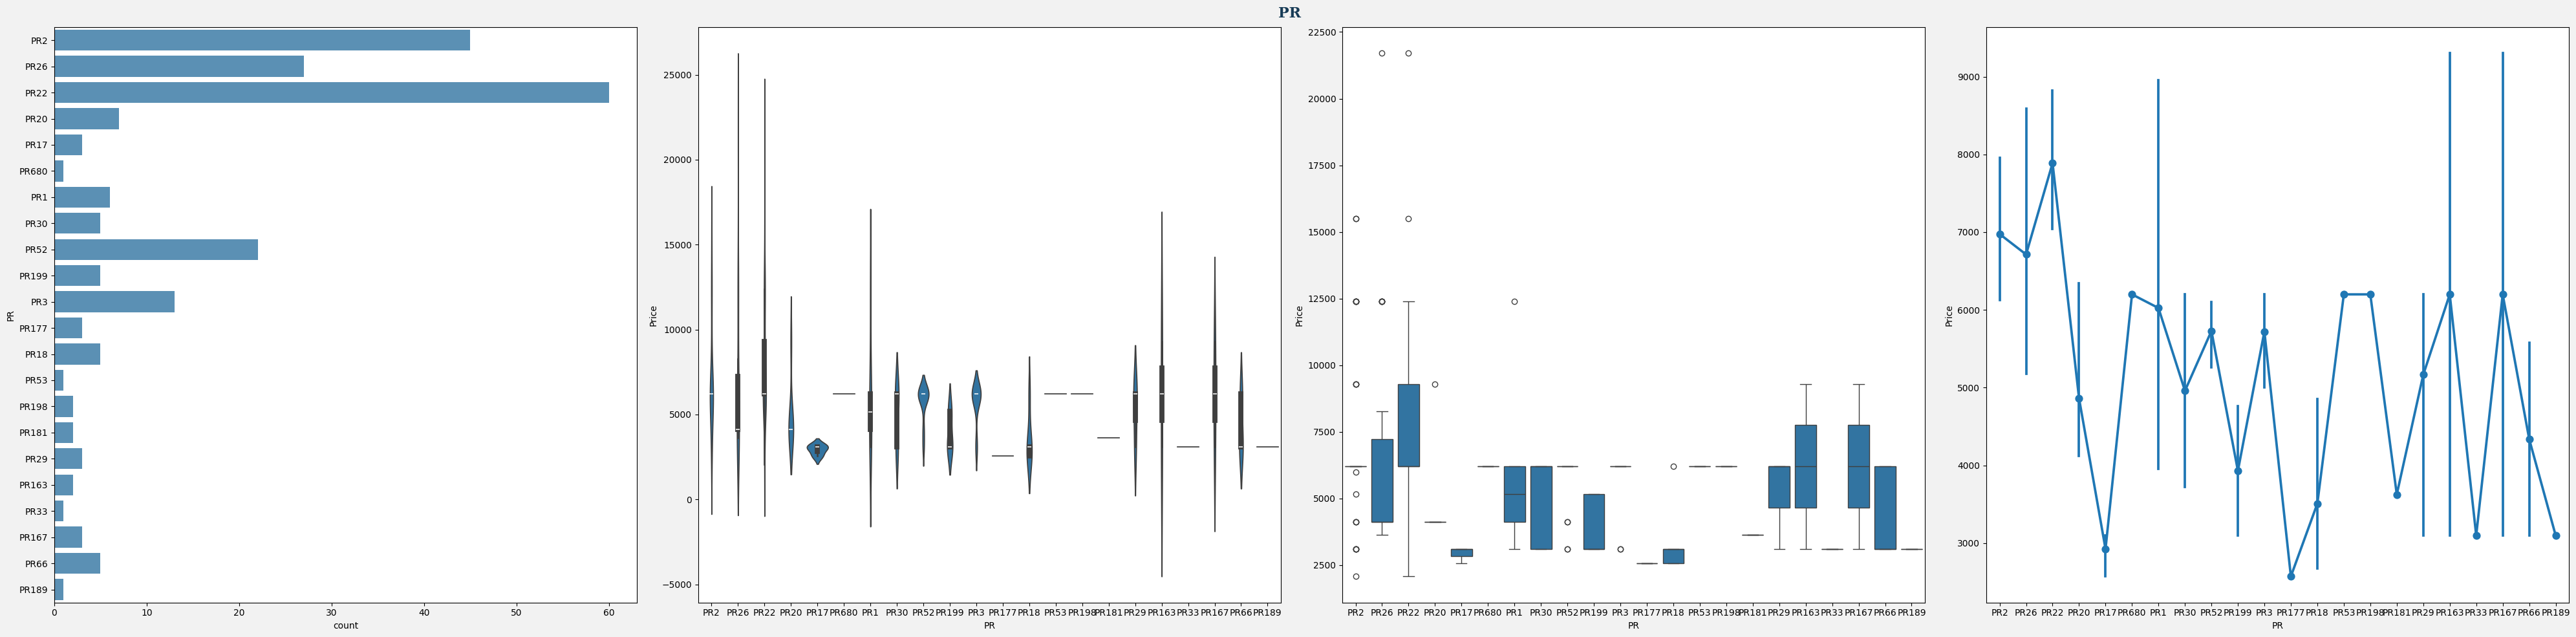

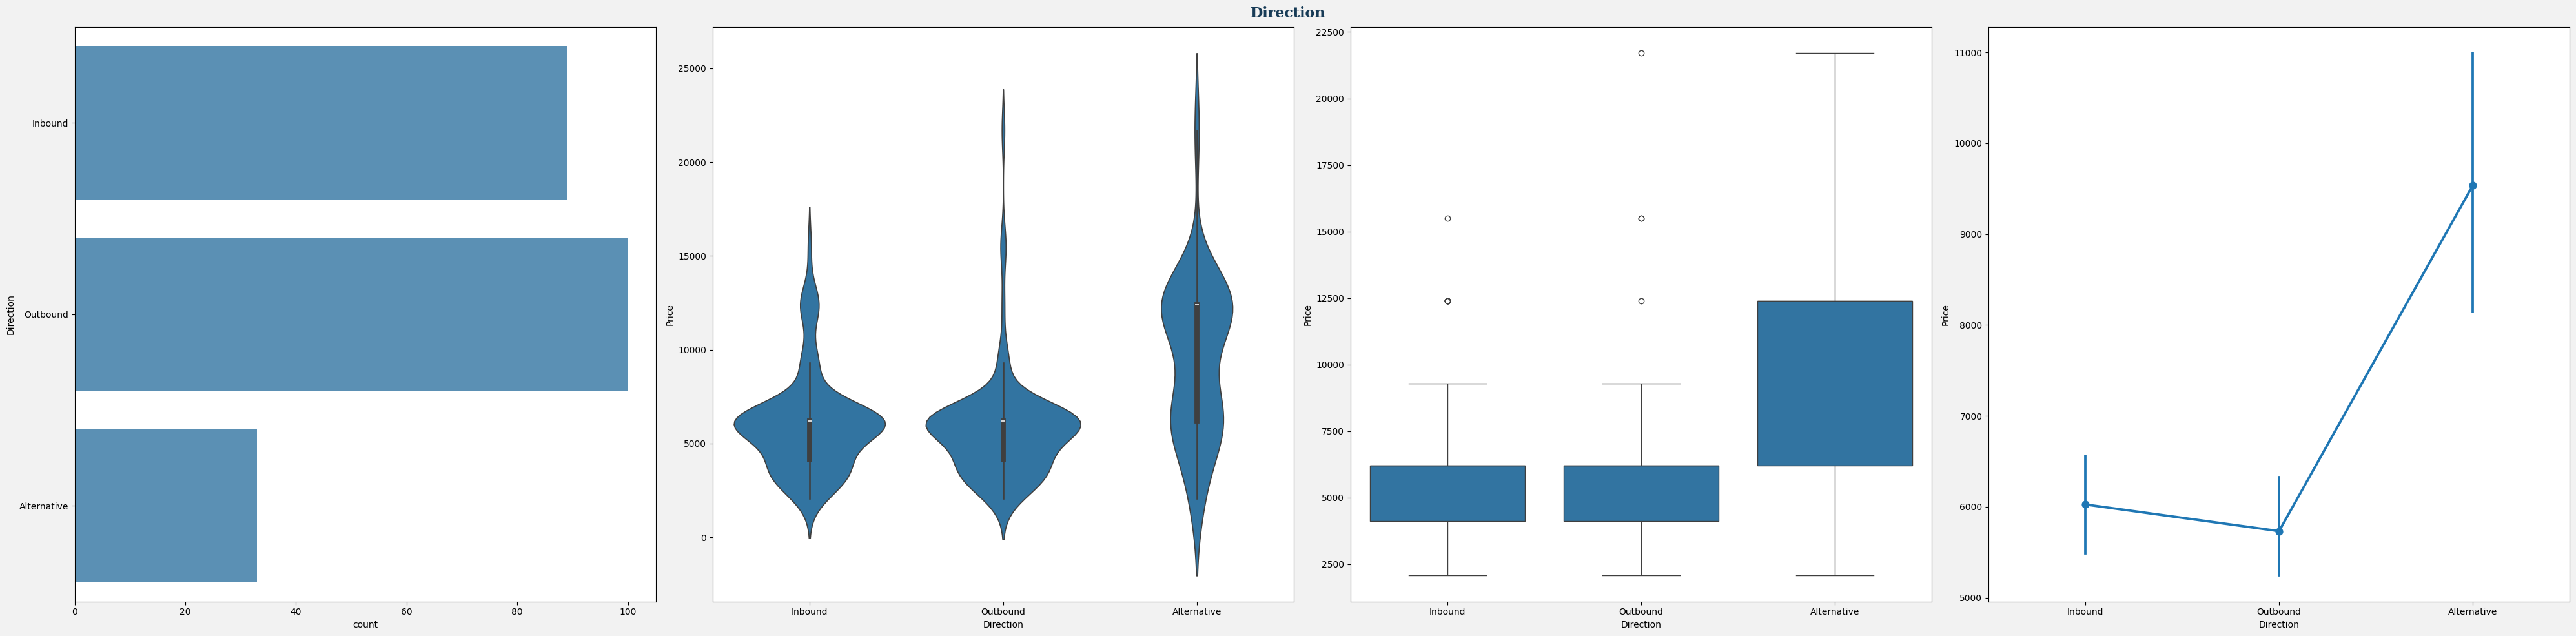

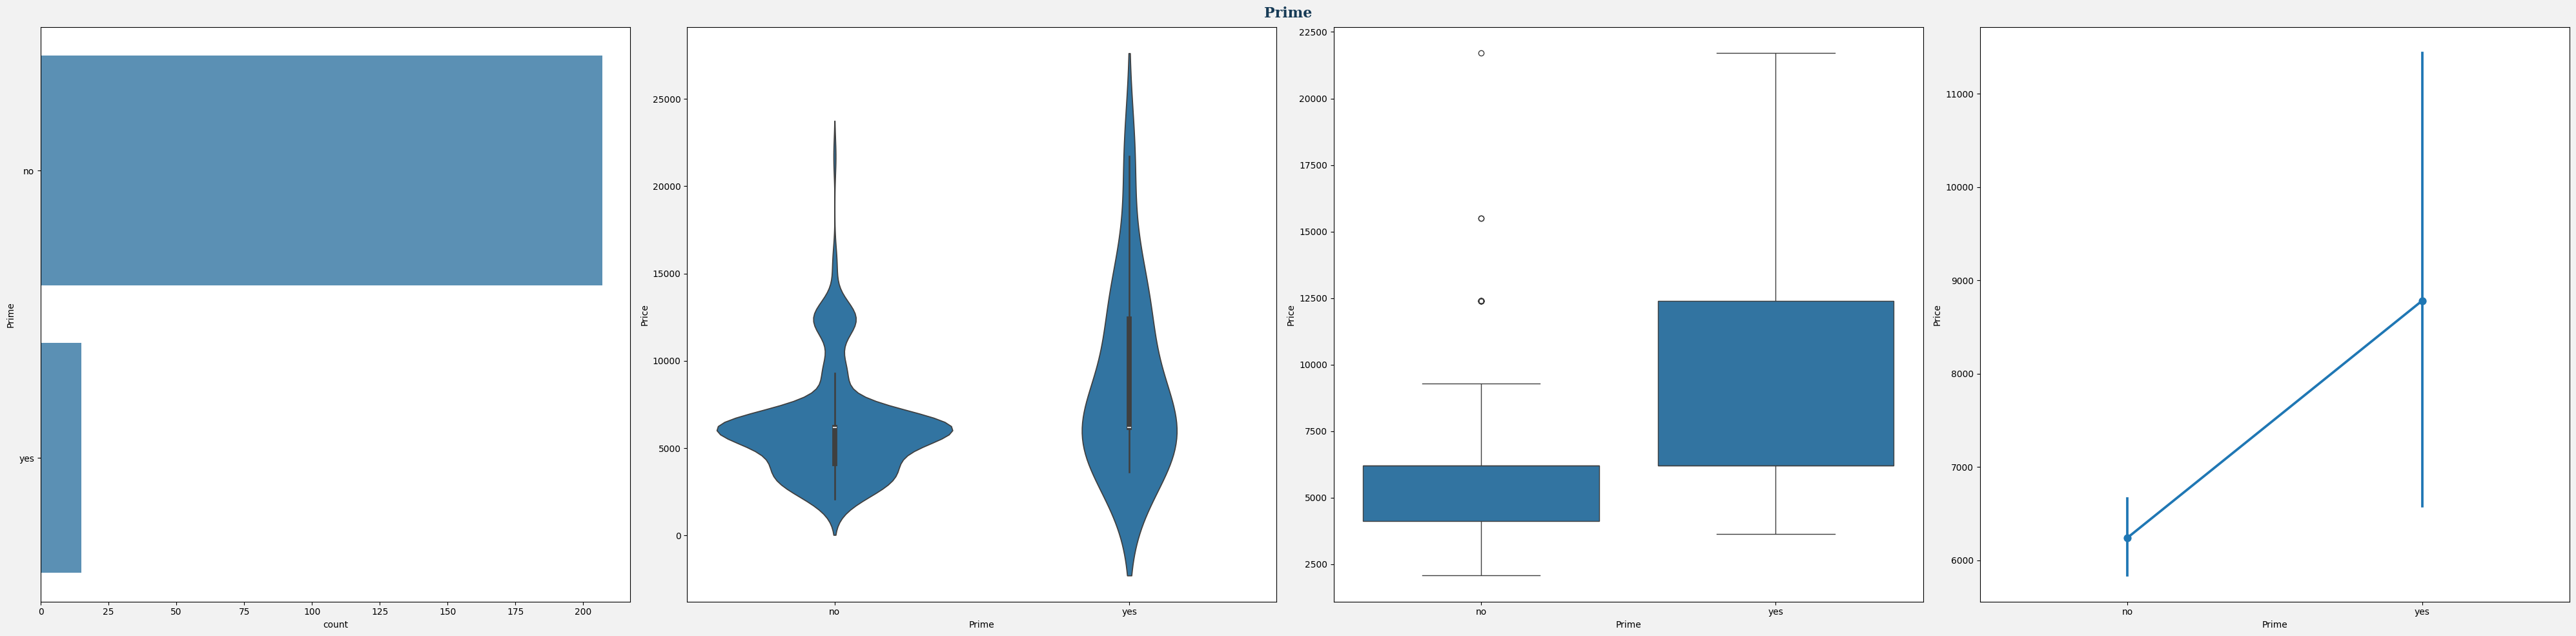

In [29]:
cleaned_data = data_null_free.copy() #create a copy
# Plots on catagorical features to check data quality and data distribution
cat_cols = cleaned_data.select_dtypes(include='object').columns.tolist()

#palette = ['#8abbd0', '#FB9851', '#36E2BD','#D0E1E1']

for feature in cat_cols:
    fig, ax = plt.subplots(1,4, figsize=(40,10))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(y=feature, data=cleaned_data, alpha=0.8, ax=ax[0])
    sns.violinplot(y='Price', x=feature, data=cleaned_data, ax=ax[1])
    sns.boxplot(y='Price', x=feature, data=cleaned_data, ax=ax[2])
    sns.pointplot(y='Price', x=feature, data=cleaned_data, ax=ax[3])

    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()

## Preprocessing

In [30]:
cleaned_data.shape

(222, 497)

In [31]:
X = cleaned_data.drop(['Price'], axis=1)
y = cleaned_data['Price']

X_df = X.copy()
y_df = y.copy()

In [32]:
from sklearn.model_selection import train_test_split

# Number of data points (rows)
num_data_points = len(y)

#Using the square root rule helps you choose a reasonable number of bins based on the number of data points,
# allowing you to create a representative histogram or digitization while avoiding too few or too many bins.

# Calculate the suggested number of bins using the square root rule
suggested_num_bins = int(np.sqrt(num_data_points))

# Now, create the bins and digitize the data
bins = np.linspace(min(y), max(y), suggested_num_bins)
y_bins = np.digitize(y, bins)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_bins, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)

(177, 496)
(45, 496)


In [33]:
print(y_bins)

[ 3  2  3  3  3  3  1  1  2  1  3  3  3  3  3  3  3  7  7  3  7  7  5  3
  2  2  2  1  1  3  3  3  3  3  3  9  2  2  3  3  3  3  3  3  3  5  2  2
  2  1  5  5  5  1  7  7  2  2  3  3  3  3  3  3  3  3  1  3  9  2  7  5
  3  3  3  3  3  3  3  1  1  7  7  7 14  7  7  7  3  3  3  3  1  1  3  3
  7  9  7  5  5  2  7  3  1  3  3  3  1  3  3  2  2  3  3  3  3  3  3  1
  3  3  3  3  3  1  3  3  7  2  3  7  2  2  3  2  2  2  2  7  7  7  3  3
  3  3  3  3  3  3  3  3  1  3  3  3  3  3  5  3  3  3  3  3  1  1  1  1
  1  1  1  1  3  1  3  3  2  5  3  3  3  3  3  3  3  3  3  1  1  1  3  3
  2  7  3  2  2  3  3  3  5  5  2  3  3  3  3  1  1  1  1  2  3 14  7  2
  1  3  2  1  1  3]


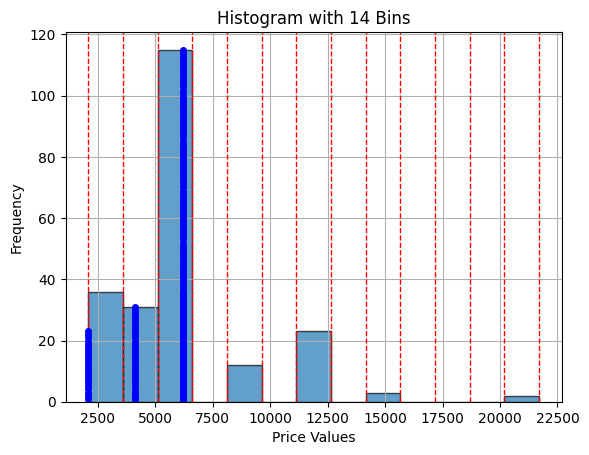

In [34]:
# Create a histogram
hist, bin_edges, _ = plt.hist(y, bins=bins, edgecolor='k', alpha=0.7)
plt.xlabel('Price Values')
plt.ylabel('Frequency')
plt.title(f'Histogram with {suggested_num_bins} Bins')
plt.grid(True)

# Add vertical lines or markers at the bin edges
for bin_edge in bin_edges:
    plt.axvline(x=bin_edge, color='r', linestyle='--', linewidth=1)

# Show individual data points as markers above the bars
for i, freq in enumerate(hist):
    for j in range(int(freq)):
        plt.plot(y[i], j + 1, 'bo', markersize=4)  # 'bo' represents blue circles

# Show the histogram
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Step 2: One-hot encode categorical variables (drop first category to avoid multicollinearity)
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True)

# Step 3: Align test categorical features to match train columns
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# Step 4: Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols,
    index=X_test.index
)

# Step 5: Concatenate processed numerical and categorical features
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

## Initial ML Models with 80/20 split

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Test set evaluation results
test_results = []

# Evaluate models
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    test_results.append({
        "Model": name,
        "MAE": round(mean_absolute_error(y_test, y_pred), 2),
        "RMSE": round(mean_squared_error(y_test, y_pred, squared=False), 2),
        "MAPE": round(mean_absolute_percentage_error(y_test, y_pred), 2),
        "R2": round(r2_score(y_test, y_pred), 2)
    })

test_results_df = pd.DataFrame(test_results)

test_results_df


Model     MAE     RMSE  MAPE    R2
0      Random Forest  705.22  1289.95  0.12  0.81
1      Decision Tree  808.38  2028.94  0.11  0.54
2  Gradient Boosting  741.74  1800.93  0.12  0.64

## Repeated 10 Folds Cross-Validation – Store All Fold Results

In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Store results per fold and repeat
results = []

for repeat in range(10):  # 10 repeats
    cv = KFold(n_splits=10, shuffle=True, random_state=42 + repeat)
    for model_name, model in models.items():
        fold_num = 1
        for train_idx, test_idx in cv.split(X_train_processed):
            X_tr, X_val = X_train_processed.iloc[train_idx], X_train_processed.iloc[test_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)
            results.append({
                "Repeat": repeat + 1,
                "Fold": fold_num,
                "Model": model_name,
                "R2": r2_score(y_val, y_pred),
                "MAE": mean_absolute_error(y_val, y_pred),
                "RMSE": mean_squared_error(y_val, y_pred, squared=False)
            })
            fold_num += 1

df_results = pd.DataFrame(results)
df_results.head(10)  # Check the first iteration


Repeat  Fold          Model        R2          MAE         RMSE
0       1     1  Random Forest  0.708363   999.081111  2315.462492
1       1     2  Random Forest  0.688021   944.269444  1563.101881
2       1     3  Random Forest  0.868376   652.603333  1129.149836
3       1     4  Random Forest  0.476964  1446.690000  2631.435927
4       1     5  Random Forest  0.733528   782.887778  1295.027718
5       1     6  Random Forest  0.765987   971.840556  2136.879878
6       1     7  Random Forest  0.804770   937.715556  1350.318800
7       1     8  Random Forest  0.927709   638.625882   868.996781
8       1     9  Random Forest  0.780049   318.330000   641.497795
9       1    10  Random Forest  0.745256   488.490000  1034.999322

## Model Comparison Table (Mean & Std of Each Metric)

In [46]:
from sklearn.model_selection import KFold
# 10x10 Cross-validation
cv_results = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    mae_scores, rmse_scores, mape_scores, r2_scores = [], [], [], []

    for _ in range(10):
        for train_idx, test_idx in kf.split(X_train_processed):
            X_cv_train, X_cv_test = X_train_processed.iloc[train_idx], X_train_processed.iloc[test_idx]
            y_cv_train, y_cv_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_test)

            mae_scores.append(mean_absolute_error(y_cv_test, y_cv_pred))
            rmse_scores.append(mean_squared_error(y_cv_test, y_cv_pred, squared=False))
            mape_scores.append(mean_absolute_percentage_error(y_cv_test, y_cv_pred))
            r2_scores.append(r2_score(y_cv_test, y_cv_pred))

    cv_results.append({
        "Model": name,
        "MAE Mean": round(np.mean(mae_scores), 2), "MAE Std": round(np.std(mae_scores), 2),
        "RMSE Mean": round(np.mean(rmse_scores), 2), "RMSE Std": round(np.std(rmse_scores), 2),
        "MAPE Mean": round(np.mean(mape_scores), 2), "MAPE Std": round(np.std(mape_scores), 2),
        "R2 Mean": round(np.mean(r2_scores), 2), "R2 Std": round(np.std(r2_scores), 2)
    })

cv_results_df = pd.DataFrame(cv_results)

# Display results
cv_results_df

Model  MAE Mean  MAE Std  RMSE Mean  RMSE Std  MAPE Mean  \
0      Random Forest    818.05   300.17    1496.69    625.14       0.13   
1      Decision Tree    981.08   507.10    2399.51    856.45       0.15   
2  Gradient Boosting    699.87   317.69    1346.82    604.91       0.11   

   MAPE Std  R2 Mean  R2 Std  
0      0.06     0.75    0.11  
1      0.10     0.25    0.45  
2      0.06     0.80    0.11

## Mean Line Plots Across Folds (With Error Bands)

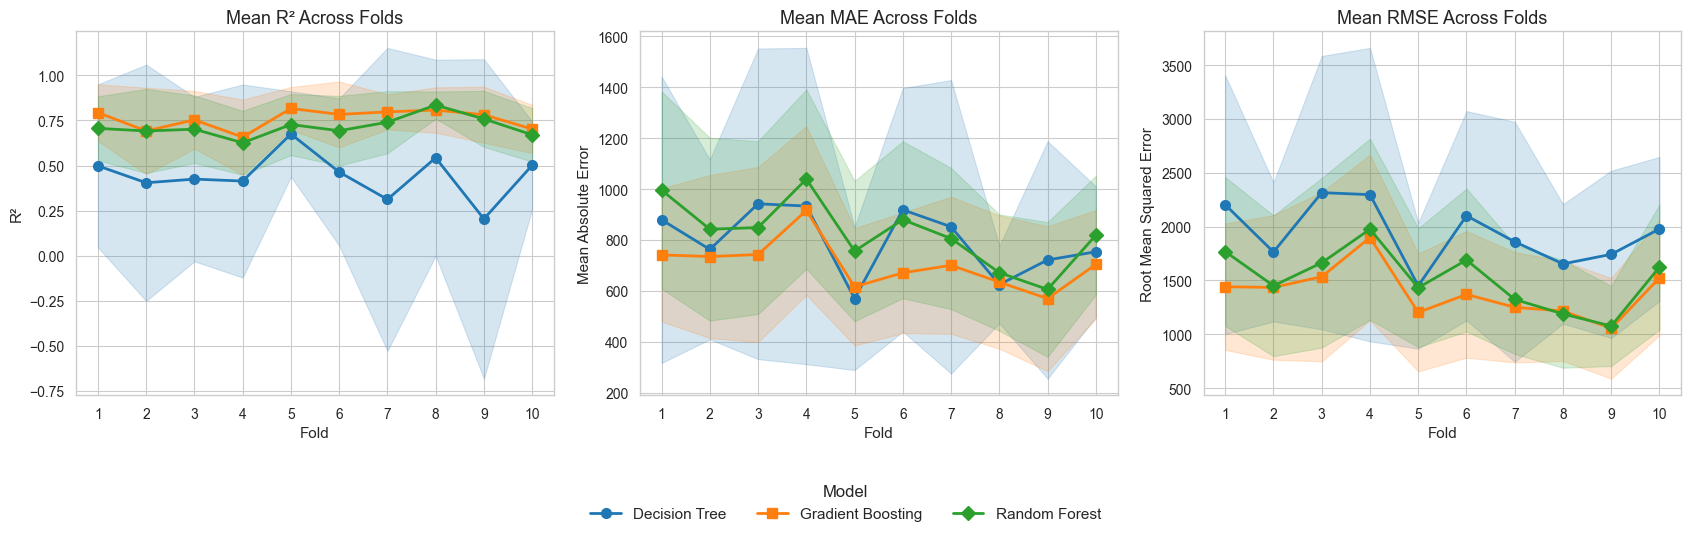

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare means and stds across all repeats for each fold and model
agg_df = df_results.groupby(["Model", "Fold"]).agg({
    "R2": ["mean", "std"],
    "MAE": ["mean", "std"],
    "RMSE": ["mean", "std"]
}).reset_index()

# Marker and color dicts
marker_dict = {
    'Decision Tree': 'o',
    'Gradient Boosting': 's',
    'Random Forest': 'D'
}
color_dict = {
    'Decision Tree': '#1f77b4',
    'Gradient Boosting': '#ff7f0e',
    'Random Forest': '#2ca02c'
}

metrics_to_plot = ["R2", "MAE", "RMSE"]
titles = ["Mean R² Across Folds", "Mean MAE Across Folds", "Mean RMSE Across Folds"]
ylabels = ["R²", "Mean Absolute Error", "Root Mean Squared Error"]

sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharex=True)

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    for model in agg_df["Model"].unique():
        m_mean = agg_df[agg_df["Model"] == model][(metric, "mean")]
        m_std = agg_df[agg_df["Model"] == model][(metric, "std")]
        folds = agg_df[agg_df["Model"] == model]["Fold"]
        line, = ax.plot(
            folds, m_mean,
            marker=marker_dict.get(model, 'o'),
            color=color_dict.get(model, None),
            label=model,
            linewidth=2,
            markersize=7
        )
        ax.fill_between(
            folds, m_mean - m_std, m_mean + m_std,
            color=color_dict.get(model, None),
            alpha=0.18
        )
    ax.set_title(titles[i], fontsize=13)
    ax.set_xlabel("Fold", fontsize=11)
    ax.set_ylabel(ylabels[i], fontsize=11)
    ax.set_xticks(range(1, 11))
    ax.tick_params(axis='both', which='major', labelsize=10)

# One legend for all axes, positioned at the bottom (horizontal)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=len(labels),         # Side by side
    fontsize=11,
    title="Model",
    title_fontsize=12,
    frameon=False
)

plt.tight_layout(rect=[0, 0.08, 1, 1])  # Make space for the legend at the bottom
plt.subplots_adjust(wspace=0.18, hspace=0)
plt.show()


In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Prepare storage for importances
feature_importances = {model_name: [] for model_name in models}

# Cross-validation loop
for repeat in range(10):  # 10 repeats
    cv = KFold(n_splits=10, shuffle=True, random_state=42 + repeat)
    for train_idx, test_idx in cv.split(X_train_processed):
        X_tr, X_val = X_train_processed.iloc[train_idx], X_train_processed.iloc[test_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
        for model_name, model in models.items():
            model.fit(X_tr, y_tr)
            feature_importances[model_name].append(model.feature_importances_)

# Convert to array for each model
for model_name in feature_importances:
    feature_importances[model_name] = np.array(feature_importances[model_name])

# Compute mean and std across folds and repeats for each feature and model
importance_dfs = {}
for model_name in models:
    mean_importance = feature_importances[model_name].mean(axis=0)
    std_importance = feature_importances[model_name].std(axis=0)
    df = pd.DataFrame({
        'Feature': X_train_processed.columns,
        'Mean Importance': mean_importance,
        'Std Importance': std_importance
    }).sort_values('Mean Importance', ascending=False).reset_index(drop=True)
    importance_dfs[model_name] = df


## Models Feature Importance

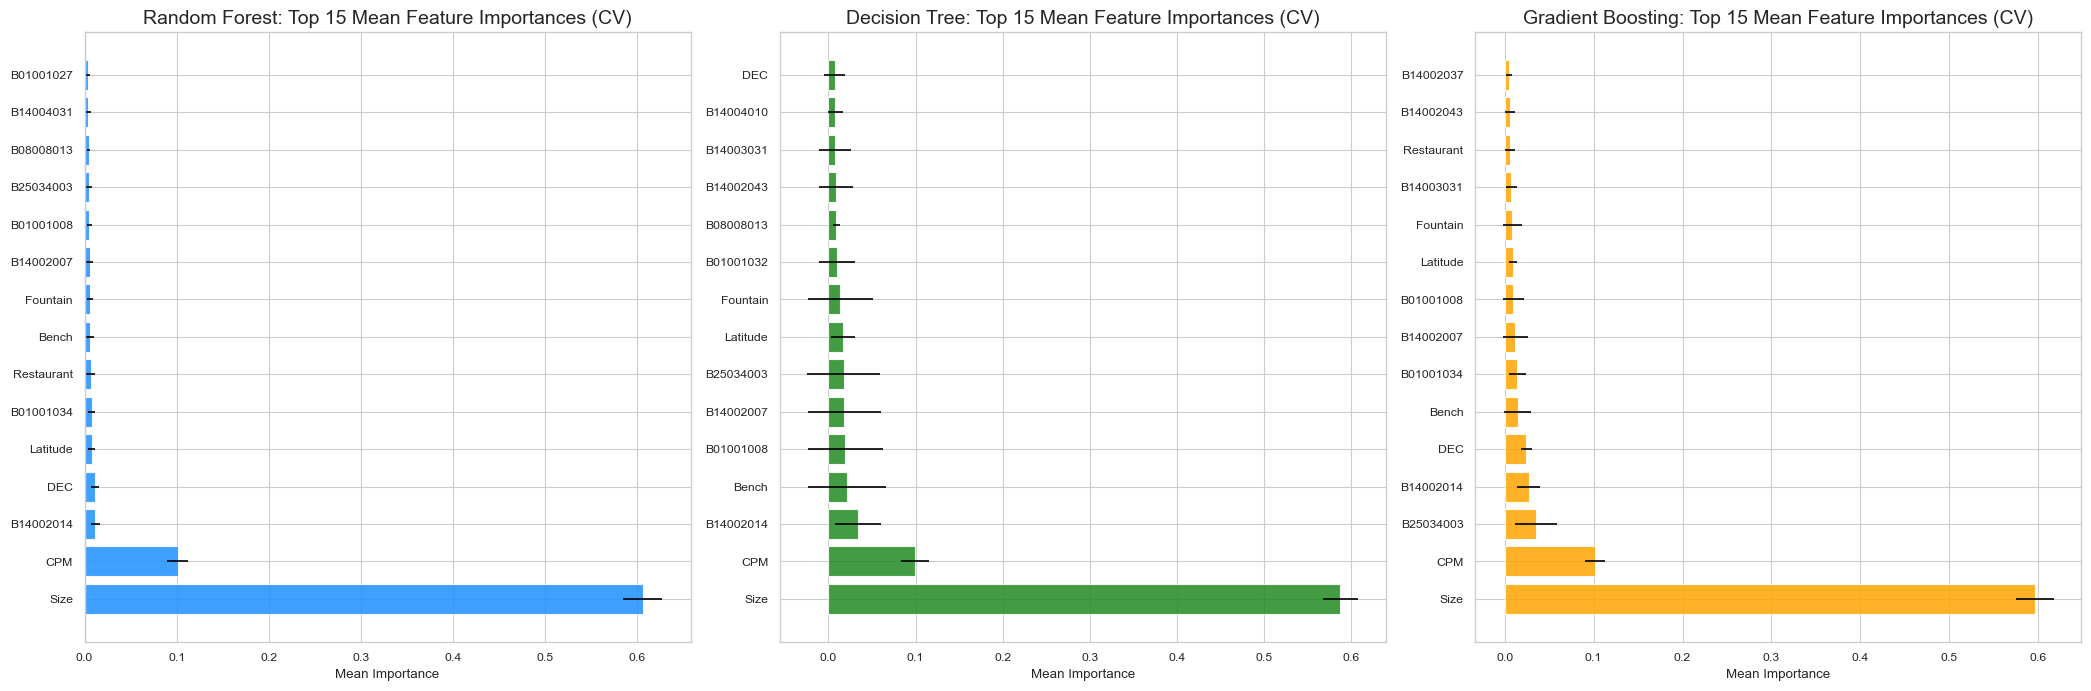

In [48]:
import matplotlib.pyplot as plt

top_n = 15
model_colors = {
    "Random Forest": "dodgerblue",
    "Decision Tree": "forestgreen",
    "Gradient Boosting": "orange"
}

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
for idx, (model_name, df) in enumerate(importance_dfs.items()):
    axes[idx].barh(
        df['Feature'][:top_n][::-1],
        df['Mean Importance'][:top_n][::-1],
        xerr=df['Std Importance'][:top_n][::-1],
        color=model_colors[model_name],
        alpha=0.85
    )
    axes[idx].set_title(f"{model_name}: Top {top_n} Mean Feature Importances (CV)", fontsize=14)
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel("Mean Importance")
plt.tight_layout()
plt.show()
